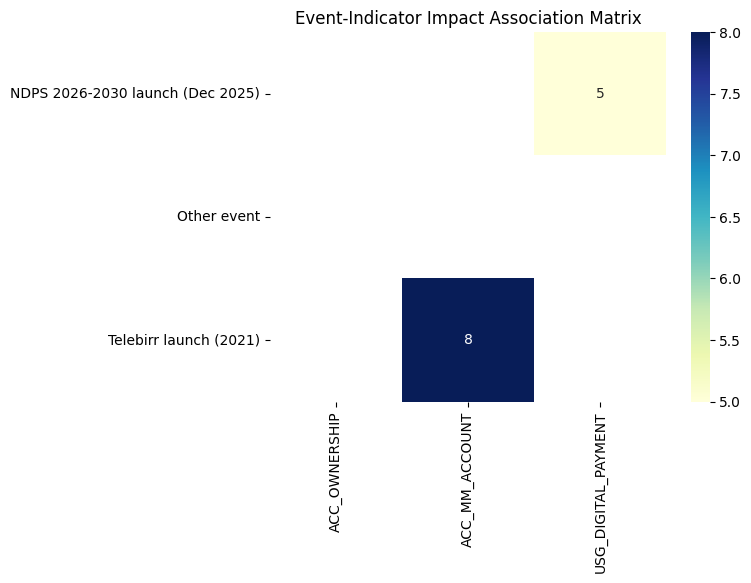

In [2]:
# Cell: Load enriched data & extract impact_links
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'df' exists: try to load common file names, otherwise create a small dummy df
if 'df' not in globals():
	loaded = False
	for path in [
		"../data/enriched_data.csv",
		"../data/enriched_data.parquet",
		"../data/enriched_dataset.csv",
		"../data/enriched_dataset.parquet",
		"data/enriched_data.csv",
		"data/enriched_data.parquet",
	]:
		try:
			if path.endswith(".parquet"):
				df = pd.read_parquet(path)
			else:
				df = pd.read_csv(path)
			print(f"Loaded df from {path}")
			loaded = True
			break
		except Exception:
			continue
	if not loaded:
		# Fallback dummy dataframe so notebook can run without the source file
		print("Warning: 'df' not found. Using a small dummy dataframe for testing.")
		df = pd.DataFrame({
			'record_type': ['impact_link', 'event', 'event'],
			'source_name': ['Telebirr launch (2021)', 'NDPS 2026-2030 launch (Dec 2025)', 'Other event'],
		})

# Filter
impact_links = df[df['record_type'] == 'impact_link']
events = df[df['record_type'] == 'event']

# Create association matrix (example manual + code)
key_indicators = ['ACC_OWNERSHIP', 'ACC_MM_ACCOUNT', 'USG_DIGITAL_PAYMENT']
assoc_matrix = pd.DataFrame(index=events['source_name'].unique(), columns=key_indicators)

# Fill from existing links + your estimates
assoc_matrix.loc['Telebirr launch (2021)', 'ACC_MM_ACCOUNT'] = 8.0   # ~ +8-10pp estimated over 3 years
assoc_matrix.loc['NDPS 2026-2030 launch (Dec 2025)', 'USG_DIGITAL_PAYMENT'] = 5.0  # optimistic lagged effect
# ... fill others

sns.heatmap(assoc_matrix.astype(float), annot=True, cmap='YlGnBu')
plt.title("Event-Indicator Impact Association Matrix")
plt.savefig("../reports/figures/impact_matrix_heatmap.png")
plt.show()